Github_link = https://github.com/Begge10850/unicorns

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import country_converter as coco
from shapely.geometry import Point
import geopandas

plt.style.use('fivethirtyeight')

In [115]:
#Loading the csv file
unicorns = pd.read_csv('C:/Users/ADMIN/Desktop/Projects/Unicorns/unicorns.csv', index_col = 0)
print("Data set loaded")

Data set loaded


In [116]:
unicorns.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry
0,ByteDance,$225,4/7/2017,China,Beijing,Media & Entertainment
1,SpaceX,$150,12/1/2012,United States,Hawthorne,Industrials
2,OpenAI,$80,7/22/2019,United States,San Francisco,Enterprise Tech
3,SHEIN,$66,7/3/2018,Singapore,Singapore City,Consumer & Retail
4,Stripe,$65,1/23/2014,United States,San Francisco,Financial Services


In [118]:
#Printing column headers
column_headers = unicorns.columns.tolist()
for header in column_headers:
    print(header)

Company
Valuation ($B)
Date Joined
Country
City
Industry


In [119]:
#Checking for missing values
missing_values = unicorns.isnull().sum()
print("Number of null values")
print(missing_values)

Number of null values
Company           0
Valuation ($B)    0
Date Joined       0
Country           0
City              0
Industry          0
dtype: int64


In [120]:
#dropping duplicates
unicorns = unicorns.drop_duplicates()
print('Duplicates dropped')

Duplicates dropped


In [121]:
num_rows = unicorns.shape[0] - 1
print("Number of rows:", num_rows)

Number of rows: 1232


In [122]:
#chaning the data type of 'Date Joined' to datetime format
unicorns['Date Joined'] = pd.to_datetime(unicorns['Date Joined'], errors = 'coerce')
non_dates = unicorns[unicorns['Date Joined'].isna()]

print(non_dates)

Empty DataFrame
Columns: [Company, Valuation ($B), Date Joined, Country, City, Industry]
Index: []


In [124]:
#Grouping the countries into continents and storing them in a new column
unicorns['Continent'] = coco.convert(names=unicorns['Country'], to = 'continent')
print("Countries grouped into Continent")

Countries grouped into Continent


In [125]:
#Changing the dtype of 'Valuation ($B)
unicorns['Valuation ($B)'] = pd.to_numeric(unicorns['Valuation ($B)'].str.replace('[\$,]', '', regex = True), errors = 'coerce')
print('Valuation ($B) data type changed')

Valuation ($B) data type changed


In [126]:
#Printing dtypes
print(unicorns.dtypes)

Company                   object
Valuation ($B)           float64
Date Joined       datetime64[ns]
Country                   object
City                      object
Industry                  object
Continent                 object
dtype: object


In [127]:
unicorns.head(10)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Continent
0,ByteDance,225.0,2017-04-07,China,Beijing,Media & Entertainment,Asia
1,SpaceX,150.0,2012-12-01,United States,Hawthorne,Industrials,America
2,OpenAI,80.0,2019-07-22,United States,San Francisco,Enterprise Tech,America
3,SHEIN,66.0,2018-07-03,Singapore,Singapore City,Consumer & Retail,Asia
4,Stripe,65.0,2014-01-23,United States,San Francisco,Financial Services,America
5,Databricks,43.0,2019-02-05,United States,San Francisco,Enterprise Tech,America
6,Canva,25.4,2018-01-08,Australia,Surry Hills,Enterprise Tech,Oceania
7,Revolut,33.0,2018-04-26,United Kingdom,London,Financial Services,Europe
8,Epic Games,22.5,2018-10-26,United States,Cary,Media & Entertainment,America
9,Fanatics,31.0,2012-06-06,United States,Jacksonville,Consumer & Retail,America


In [128]:
#checking the number of companies in each continent
continent_stats = unicorns['Continent'].value_counts()
print(continent_stats)

Continent
America    711
Asia       334
Europe     173
Oceania      9
Africa       6
Name: count, dtype: int64


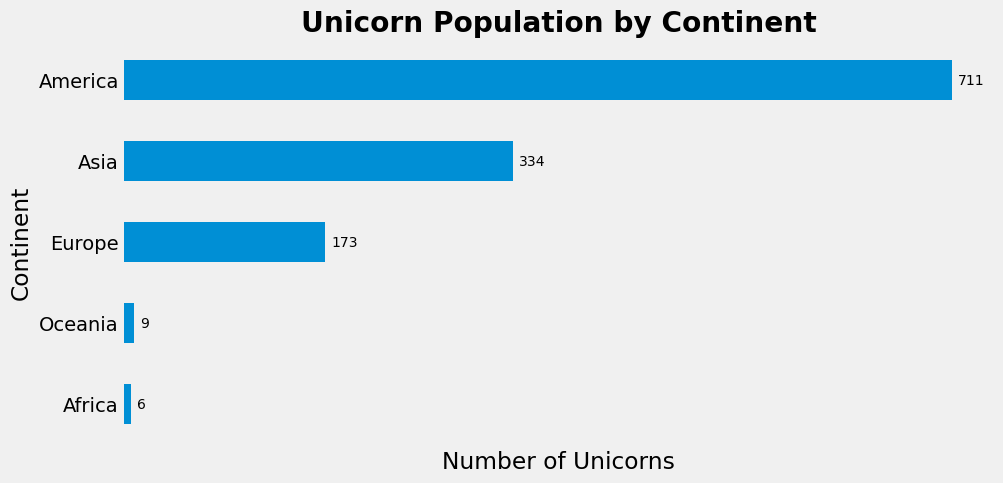

In [129]:
#Drawing a horizonatal bar graph to visualize the continent stats
continent_stats = unicorns['Continent'].value_counts()

plt.figure(figsize=(10, 5))
bars = continent_stats.plot(kind='barh')

plt.xlabel('Number of Unicorns')
plt.xticks([])

plt.ylabel('Continent')

plt.title('Unicorn Population by Continent', fontweight='bold')
plt.gca().invert_yaxis()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

for bar, count in zip(bars.patches, continent_stats):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, f'{count}', ha='left', va='center', fontsize=10)

plt.tick_params(axis='both', which='both', length=0)

plt.grid(False)

plt.show()

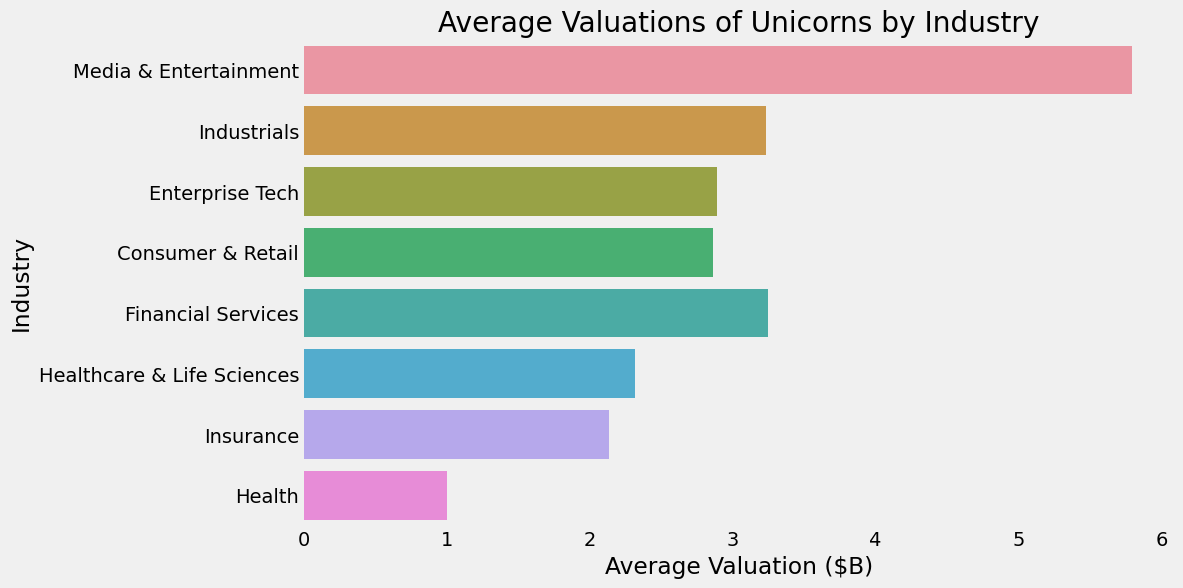

In [130]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'Valuation ($B)', y = 'Industry', data = unicorns, estimator = lambda x: sum(x) / len(x), errorbar = None)
plt.title('Average Valuations of Unicorns by Industry')

plt.xlabel('Average Valuation ($B)')

plt.ylabel('Industry')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.tick_params(axis='both', which='both', length=0)

plt.grid(False)

plt.show()

In [131]:
#checking the number of companies in each continent
country_stats = unicorns['Country'].value_counts()
print(country_stats)

Country
United States           656
China                   168
India                    71
United Kingdom           54
Germany                  31
France                   26
Israel                   25
Canada                   21
Brazil                   17
Singapore                17
South Korea              15
Australia                 9
Netherlands               9
Mexico                    8
Hong Kong                 7
Ireland                   7
Japan                     7
Indonesia                 7
Switzerland               6
Sweden                    6
Spain                     5
United Arab Emirates      5
Finland                   4
Norway                    4
Italy                     3
Belgium                   3
Colombia                  3
Thailand                  3
Turkey                    3
Austria                   2
Denmark                   2
Croatia                   2
Seychelles                2
Vietnam                   2
Greece                    2
Chile       

In [132]:
# Sort companies by valuation and select top 10
top_10_companies = unicorns.nlargest(10, 'Valuation ($B)')
print("Top 10 companies sorted")

Top 10 companies sorted


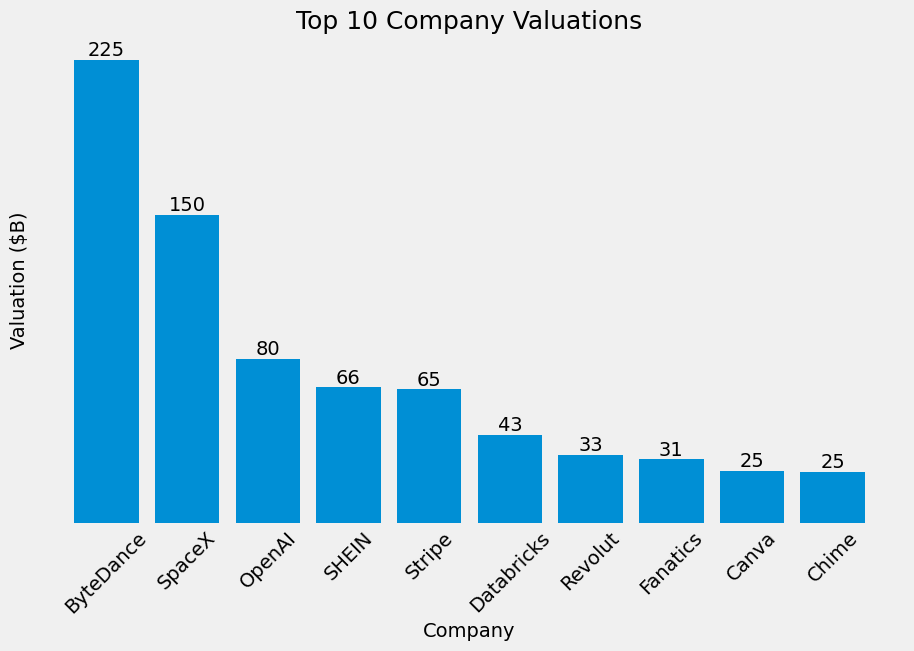

In [133]:
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_companies["Company"], top_10_companies["Valuation ($B)"])
plt.xlabel('Company',fontsize= 14)
plt.ylabel('Valuation ($B)', fontsize= 14)
plt.title('Top 10 Company Valuations',fontsize= 18)
plt.xticks(rotation=45)

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Annotate values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.tick_params(axis='x', length=0)
plt.yticks([])

plt.grid(False)

plt.show()

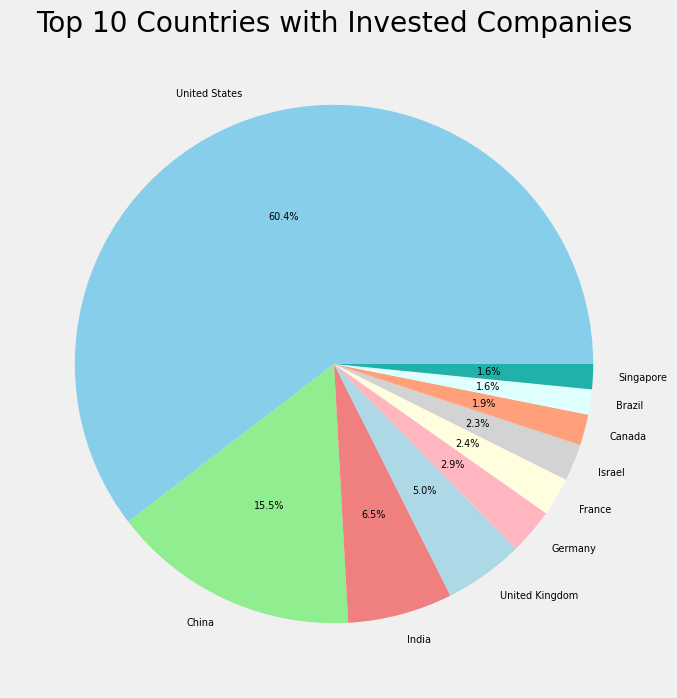

In [134]:
top_10_countries = unicorns["Country"].value_counts().nlargest(10)
plt.figure(figsize=(12, 8))
top_10_countries.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'lightblue', 'lightpink', 'lightyellow', 'lightgrey', 'lightsalmon', 'lightcyan', 'lightseagreen'], fontsize= 7)
plt.title('Top 10 Countries with Invested Companies')
plt.ylabel('')
plt.show()

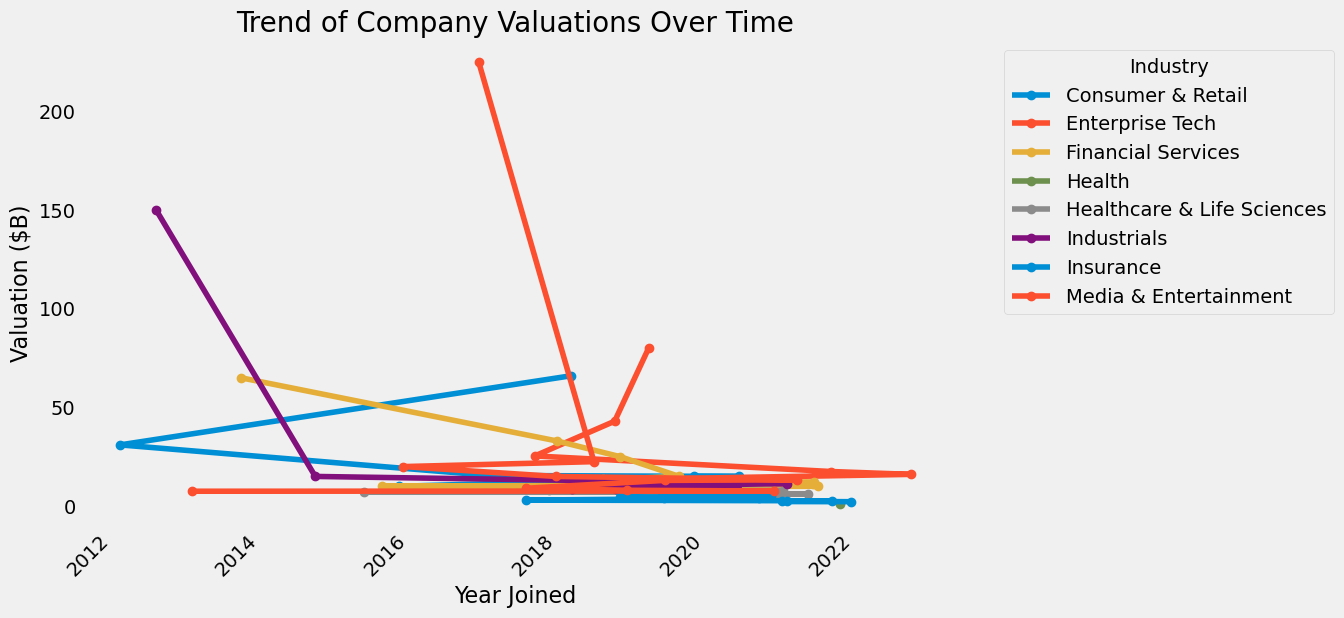

In [135]:
# Plot: Line plot illustrating the trend of company valuations over time
plt.figure(figsize=(10, 6))
for industry, group in unicorns.groupby('Industry'):
    group = group.nlargest(10, 'Valuation ($B)')
    plt.plot(group['Date Joined'], group['Valuation ($B)'], label=industry, marker='o', linestyle='-')
plt.title('Trend of Company Valuations Over Time', fontsize=20)
plt.xlabel('Year Joined', fontsize=16)
plt.ylabel('Valuation ($B)', fontsize=16)
plt.xticks(rotation=45)
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tick_params(axis='x', length=0)

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)

plt.grid(False)

plt.show()

d:\Anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


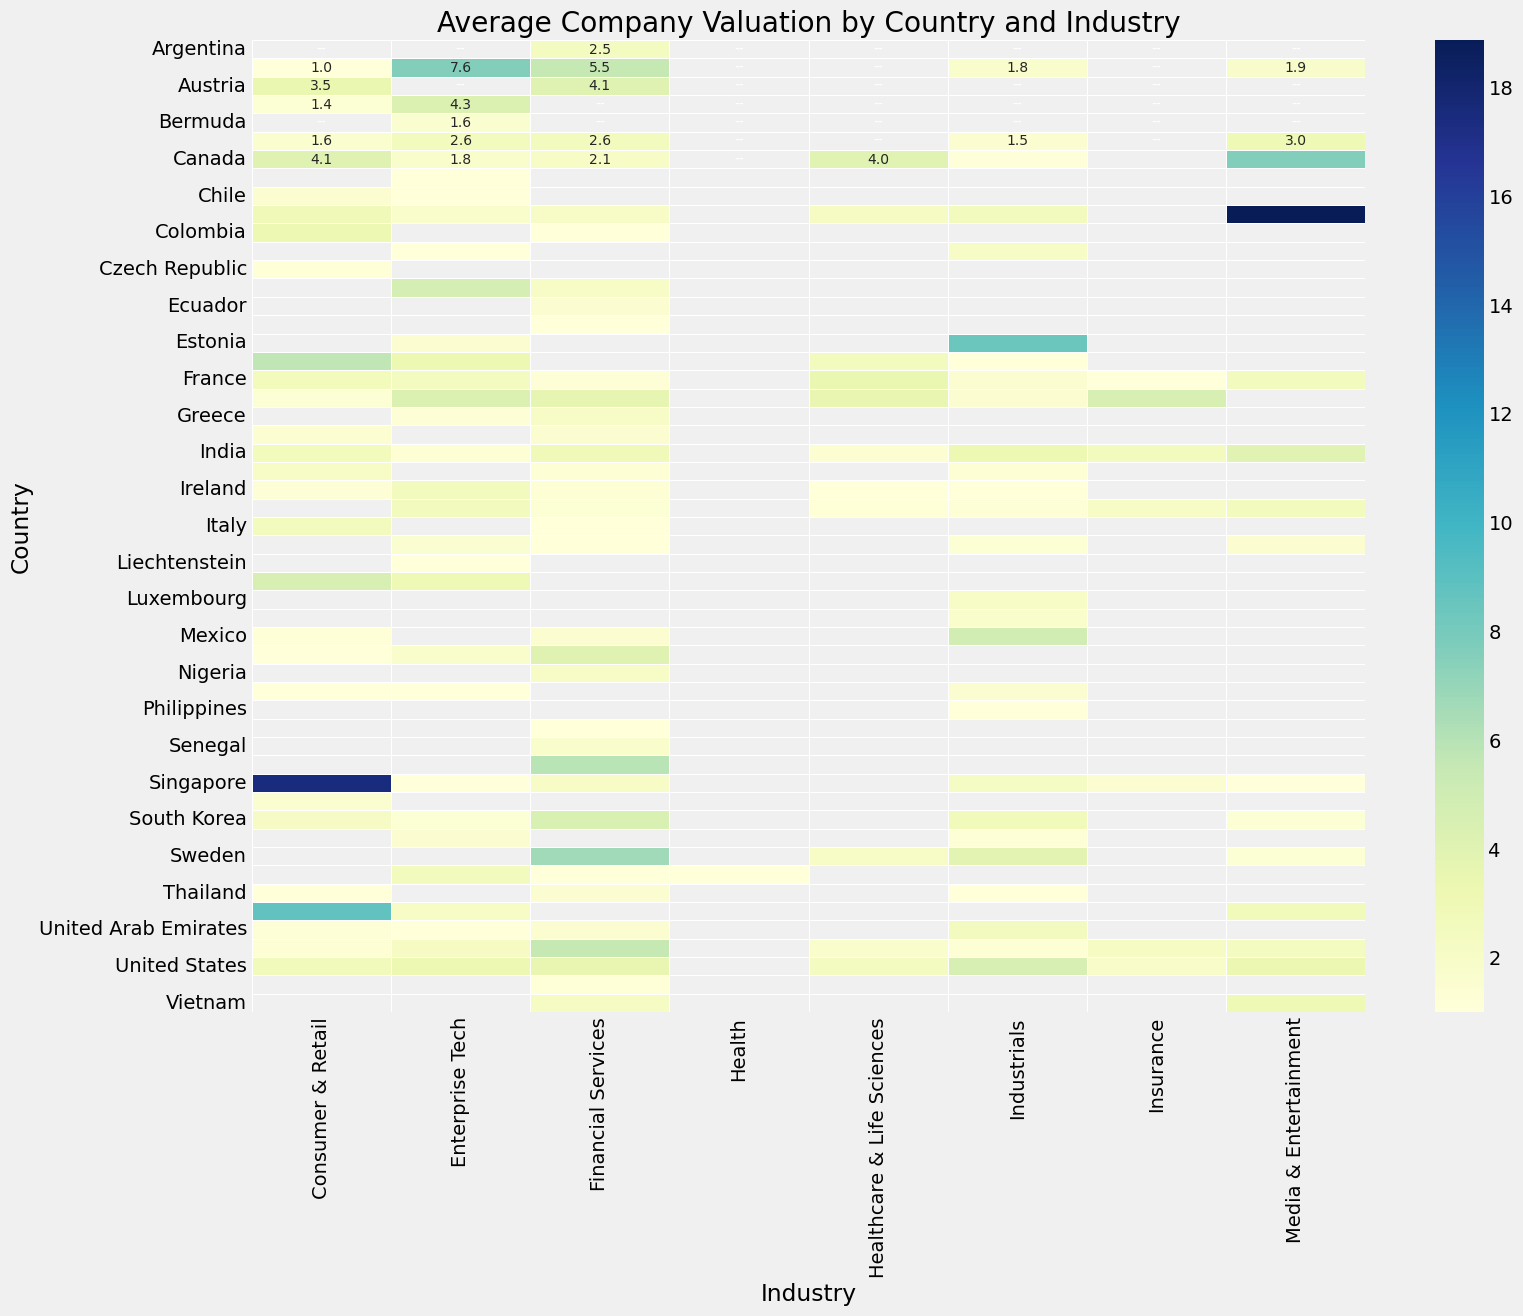

In [136]:
# Pivot the data to create a heatmap
heatmap_data = unicorns.pivot_table(index='Country', columns='Industry', values='Valuation ($B)', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5, annot_kws={"ha": 'center', "va": 'center', 'fontsize': 10})
plt.title('Average Company Valuation by Country and Industry')
plt.xlabel('Industry')
plt.ylabel('Country')
plt.xticks(rotation=90)

plt.grid(False)

plt.show()

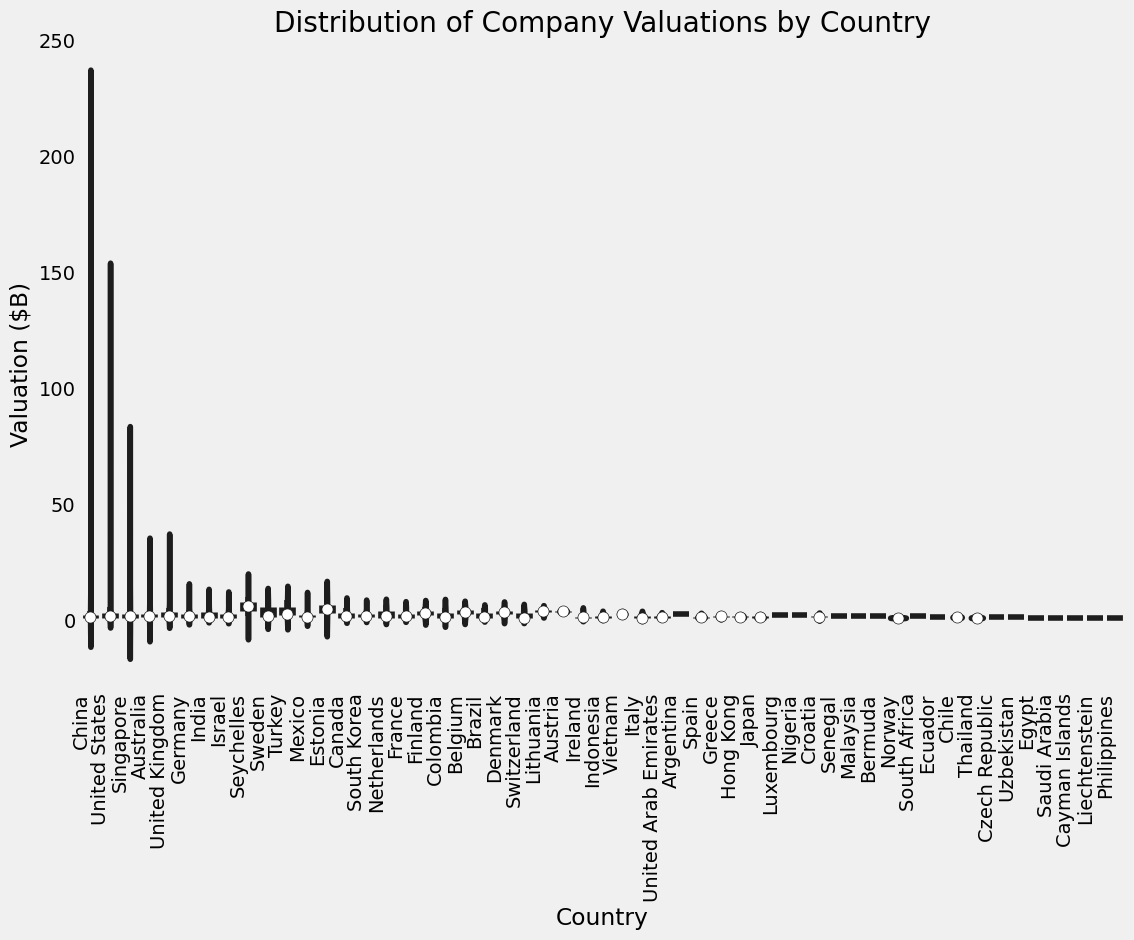

In [139]:
# Plot the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=unicorns, x='Country', y='Valuation ($B)', palette='viridis')
plt.title('Distribution of Company Valuations by Country')
plt.xlabel('Country')
plt.ylabel('Valuation ($B)')
plt.xticks(rotation=90, ha='right')

plt.grid(False)

plt.show()